In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
import numpy as np
import warnings

sys.path.append('/Vol0/user/a.vorontsova/FlavorNet/utilities/slam_metrics')
sys.path.append('/Vol0/user/a.vorontsova/FlavorNet/utils')
sys.path.append('/Vol0/user/a.vorontsova/FlavorNet/utils/prepare_datasets/struct2depth')
sys.path.append('/Vol0/user/a.vorontsova/FlavorNet/utils/prepare_datasets/depth_pred')
sys.path.append('/Vol0/user/a.vorontsova/FlavorNet/tfoptflow/tfoptflow')

warnings.simplefilter('ignore')

In [4]:
image_directory = None
depth_directory = None
video_path = None
json_path = None
csv_path = None
txt_path = None

optical_flow_estimator_name = 'pwc'
depth_estimator_name = 'struct2depth'
#depth_estimator_name = 'senet'

computation_kwargs = dict(
    cuda_visible_devices=3,
)

In [12]:
from dataset_builder import *

In [13]:
# build_from = DIRECTORY
build_from = VIDEO
# build_from = CSV
# build_from = KITTI
# build_from = DISCOMAN
# build_from = TUM

In [14]:
optical_flow_estimator_name = 'pwc'
depth_estimator_name = 'struct2depth'

In [15]:
if build_from == VIDEO:
    sequence_directory = 'test_build_from_video'
    video_path = '/Vol1/dbstore/datasets/saic_odometry/07/t_video5316726383492203313.mp4'
    DatasetBuilder = VideoDatasetBuilder

if build_from == DIRECTORY:
    sequence_directory = 'test_build_from_dir'
    image_directory = '/Vol1/dbstore/datasets/KITTI_odometry_2012/dataset/sequences/00/image_2'
    DatasetBuilder = ImagesDatasetBuilder
    
if build_from == CSV:
    sequence_directory = 'test_build_from_csv'
    csv_path = ''
    DatasetBuilder = CSVDatasetBuilder

if build_from == KITTI:
    sequence_directory = 'test_build_kitti'
    image_directory = '/Vol1/dbstore/datasets/KITTI_odometry_2012/dataset/sequences/00/image_2'
    depth_directory = '/Vol1/dbstore/datasets/KITTI_odometry_2012/dataset/sequences/00/depth_2'
    depth_estimator_name = None
    DatasetBuilder = KITTIDatasetBuilder
    
if build_from == DISCOMAN:
    sequence_directory = 'test_build_discoman'
    json_path = '/Vol1/dbstore/datasets/renderbox/v10.5/traj/output/train/0000/0_traj.json'
    depth_estimator_name = None
    DatasetBuilder = DISCOMANDatasetBuilder
    
if build_from == TUM:
    sequence_directory = 'test_build_tum'
    txt_path = '/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd_dataset_freiburg2_coke/groundtruth.txt'
    DatasetBuilder = TUMDatasetBuilder

In [16]:
estimate_optical_flow = optical_flow_estimator_name is not None
estimate_depth = depth_estimator_name is not None

### Initialize

In [17]:
builder = DatasetBuilder(sequence_directory, 
                         build_from=build_from,
                         image_directory=image_directory,
                         depth_directory=depth_directory,
                         video_path=video_path,
                         json_path=json_path,
                         csv_path=csv_path,
                         txt_path=txt_path,
                         mode=DatasetBuilder.TEST,
                         estimate_depth=estimate_depth,
                         estimate_optical_flow=estimate_optical_flow,
                         optical_flow_estimator_name=optical_flow_estimator_name,
                         depth_estimator_name=depth_estimator_name,
                         memory_safe=True,
                         **computation_kwargs)
builder

DatasetBuilder(dir=test_build_from_video, build_from=VIDEO,
            image_dir=None, depth_dir=test_build_from_video/depth, csv_filename=df.csv,
            video_path=/Vol1/dbstore/datasets/saic_odometry/07/t_video5316726383492203313.mp4, json_path=None, csv_path=None,
            mode=test, image_height=None, image_width=None, stride=1, fps=30,
            optical_flow=True, optical_flow_estimator=pwc, optical_flow_checkpoint=/Vol0/user/f.konokhov/tfoptflow/tfoptflow/models/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000,
            depth=True, depth_estimator=struct2depth, depth_checkpoint=struct2depth/model/model-199160,
            cuda_visible_devices=3

### Build

In [18]:
builder._configure()

Total: 1289 frames
Saved: 1289 frames
Using FPS rate = 28.571428571428573


In [19]:
if builder.build_from == VIDEO:
    print(builder.video_parser)
    print(builder.fps)

if builder.build_from == DIRECTORY:
    pass
    
if builder.build_from == CSV:
    pass

if builder.build_from == KITTI:
    pass

if builder.build_from == DISCOMAN:
    print(builder.parser)
    
if builder.build_from == TUM:
    print(builder.parser)    

VideoParser(image_manager=ImageManager(dir=test_build_from_video/images, image_height=360, image_width=640, stride=1, sample=True, step=1), video_path=/Vol1/dbstore/datasets/saic_odometry/07/t_video5316726383492203313.mp4, video_duration=45.08, num_frames=1289)
28.571428571428573


In [20]:
builder

DatasetBuilder(dir=test_build_from_video, build_from=VIDEO,
            image_dir=test_build_from_video/images, depth_dir=test_build_from_video/depth, csv_filename=df.csv,
            video_path=/Vol1/dbstore/datasets/saic_odometry/07/t_video5316726383492203313.mp4, json_path=None, csv_path=None,
            mode=test, image_height=None, image_width=None, stride=1, fps=28.571428571428573,
            optical_flow=True, optical_flow_estimator=pwc, optical_flow_checkpoint=/Vol0/user/f.konokhov/tfoptflow/tfoptflow/models/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000,
            depth=True, depth_estimator=struct2depth, depth_checkpoint=struct2depth/model/model-199160,
            cuda_visible_devices=3

In [21]:
print(builder.dataframe.shape)
builder.dataframe.head()

(1289, 8)


,path_to_rgb,x,y,z,euler_x,euler_y,euler_z,timestamps
0,test_build_from_video/images/0000000000.jpg,0,0,0,0,0,0,0.000
1,test_build_from_video/images/0000000001.jpg,0,0,0,0,0,0,0.035
2,test_build_from_video/images/0000000002.jpg,0,0,0,0,0,0,0.070
3,test_build_from_video/images/0000000003.jpg,0,0,0,0,0,0,0.105
4,test_build_from_video/images/0000000004.jpg,0,0,0,0,0,0,0.140


In [22]:
!nvidia-smi

Mon May 20 18:21:40 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.40.04    Driver Version: 418.40.04    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P40           Off  | 00000000:04:00.0 Off |                  Off |
| N/A   49C    P0    57W / 250W |  17116MiB / 24451MiB |     22%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla P40           Off  | 00000000:06:00.0 Off |                  Off |
| N/A   48C    P0   109W / 250W |  17785MiB / 24451MiB |     53%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

### Estimate depth 

In [23]:
if builder.estimate_depth:
    builder._run_estimator_wrapper(builder.depth_estimator, builder.depth_checkpoint, builder.depth_directory, dataframe_col='path_to_depth')
    print(builder.depth_directory)



Computation settings:



Using TensorFlow backend.


CUDA visible devices:     3
Available GPUs:           /job:localhost/replica:0/task:0/device:GPU:0
Allow growth:             True
GPU memory fraction:      0.33
Number of CPU:            8
Number of CPU threads:    16

Random seed:              42



Instructions for updating:
Colocations handled automatically by placer.


W0520 18:21:47.031410 47761514663552 deprecation.py:323] From /Vol0/user/a.vorontsova/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use keras.layers.batch_normalization instead.


W0520 18:21:47.047110 47761514663552 deprecation.py:323] From /Vol0/user/a.vorontsova/FlavorNet/utils/prepare_datasets/struct2depth/nets.py:503: batch_normalization (from tensorflow.python.layers.normalization) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.batch_normalization instead.
W0520 18:21:49.584946 47761514663552 util.py:204] Shape mismatch, will not restore egomotion_prediction/pose_exp_net/pose/cnv6/weights.
W0520 18:21:49.586396 47761514663552 util.py:206] The following variables in the checkpoint were not loaded:


Instructions for updating:
Please switch to tf.train.MonitoredTrainingSession


W0520 18:21:49.755541 47761514663552 deprecation.py:323] From /Vol0/user/a.vorontsova/FlavorNet/utils/prepare_datasets/estimator.py:90: Supervisor.__init__ (from tensorflow.python.training.supervisor) is deprecated and will be removed in a future version.
Instructions for updating:
Please switch to tf.train.MonitoredTrainingSession


INFO:tensorflow:Running local_init_op.


I0520 18:21:55.900465 47761514663552 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0520 18:21:55.923890 47761514663552 session_manager.py:493] Done running local_init_op.


INFO:tensorflow:Starting standard services.


I0520 18:21:57.285123 47761514663552 supervisor.py:733] Starting standard services.


INFO:tensorflow:Starting queue runners.


I0520 18:21:57.288004 47761514663552 supervisor.py:740] Starting queue runners.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


W0520 18:21:57.290005 47761514663552 deprecation.py:323] From /Vol0/user/a.vorontsova/miniconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from struct2depth/model/model-199160


I0520 18:21:57.293244 47761514663552 saver.py:1270] Restoring parameters from struct2depth/model/model-199160


test_build_from_video/depth


In [24]:
!nvidia-smi

Mon May 20 18:23:14 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.40.04    Driver Version: 418.40.04    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P40           Off  | 00000000:04:00.0 Off |                  Off |
| N/A   50C    P0    57W / 250W |  17116MiB / 24451MiB |     55%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla P40           Off  | 00000000:06:00.0 Off |                  Off |
| N/A   48C    P0    64W / 250W |  17785MiB / 24451MiB |     83%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [25]:
if builder.estimate_depth:
    get_basename = lambda x: os.path.splitext(os.path.basename(x))[0]

    depth_filenames = os.listdir(builder.depth_directory)
    assert len(depth_filenames) == len(builder.image_manager.image_filenames)
    assert np.array_equal(sorted(list(map(get_basename, depth_filenames))), sorted(list(map(get_basename, builder.image_manager.image_filenames))))

In [26]:
print(builder.dataframe.shape)
builder.dataframe.head()

(1289, 9)


,path_to_rgb,x,y,z,euler_x,euler_y,euler_z,timestamps,path_to_depth
0,test_build_from_video/images/0000000000.jpg,0,0,0,0,0,0,0.000,test_build_from_video/depth/0000000000.npy
1,test_build_from_video/images/0000000001.jpg,0,0,0,0,0,0,0.035,test_build_from_video/depth/0000000001.npy
2,test_build_from_video/images/0000000002.jpg,0,0,0,0,0,0,0.070,test_build_from_video/depth/0000000002.npy
3,test_build_from_video/images/0000000003.jpg,0,0,0,0,0,0,0.105,test_build_from_video/depth/0000000003.npy
4,test_build_from_video/images/0000000004.jpg,0,0,0,0,0,0,0.140,test_build_from_video/depth/0000000004.npy


### Estimate optical flow

In [ ]:
if builder.estimate_optical_flow:
    builder._run_estimator_wrapper(builder.optical_flow_estimator, builder.optical_flow_checkpoint, builder.optical_flow_directory, 
                                   dataframe_col='path_to_optical_flow')
    print(builder.optical_flow_directory)

In [28]:
!nvidia-smi

Mon May 20 18:26:23 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.40.04    Driver Version: 418.40.04    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P40           Off  | 00000000:04:00.0 Off |                  Off |
| N/A   51C    P0   196W / 250W |  17116MiB / 24451MiB |    100%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla P40           Off  | 00000000:06:00.0 Off |                  Off |
| N/A   50C    P0   119W / 250W |  17785MiB / 24451MiB |     99%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [29]:
if builder.estimate_optical_flow:
    get_basename = lambda x: os.path.splitext(os.path.basename(x))[0]
    optical_flow_filenames = os.listdir(builder.optical_flow_directory)
    assert len(optical_flow_filenames) == len(builder.image_manager.image_filenames) - 1
    assert np.array_equal(sorted(list(map(get_basename, optical_flow_filenames))), sorted(list(map(get_basename, builder.image_manager.image_filenames)))[1:])

In [30]:
print(builder.dataframe.shape)
builder.dataframe.head()

(1289, 10)


,path_to_rgb,x,y,z,euler_x,euler_y,euler_z,timestamps,path_to_depth,path_to_optical_flow
0,test_build_from_video/images/0000000000.jpg,0,0,0,0,0,0,0.000,test_build_from_video/depth/0000000000.npy,test_build_from_video/optical_flow_stride1/000...
1,test_build_from_video/images/0000000001.jpg,0,0,0,0,0,0,0.035,test_build_from_video/depth/0000000001.npy,test_build_from_video/optical_flow_stride1/000...
2,test_build_from_video/images/0000000002.jpg,0,0,0,0,0,0,0.070,test_build_from_video/depth/0000000002.npy,test_build_from_video/optical_flow_stride1/000...
3,test_build_from_video/images/0000000003.jpg,0,0,0,0,0,0,0.105,test_build_from_video/depth/0000000003.npy,test_build_from_video/optical_flow_stride1/000...
4,test_build_from_video/images/0000000004.jpg,0,0,0,0,0,0,0.140,test_build_from_video/depth/0000000004.npy,test_build_from_video/optical_flow_stride1/000...


### Visualize

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load(path):
    if path.endswith('npy'):
        return np.load(path)
    return cv2.imread(path)[:, :, ::-1]


def visualize_depth(depth):
    plt.imshow(depth[..., 0], cmap='RdBu')
    plt.show()

def visualize_optical_flow(optical_flow):
    fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
    ax[0].imshow(optical_flow[..., 0], cmap='RdBu')
    ax[1].imshow(optical_flow[..., 1], cmap='RdBu')
    plt.show()

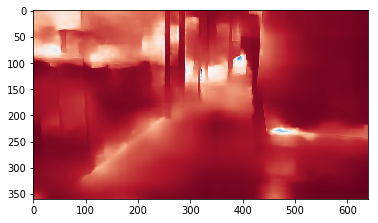

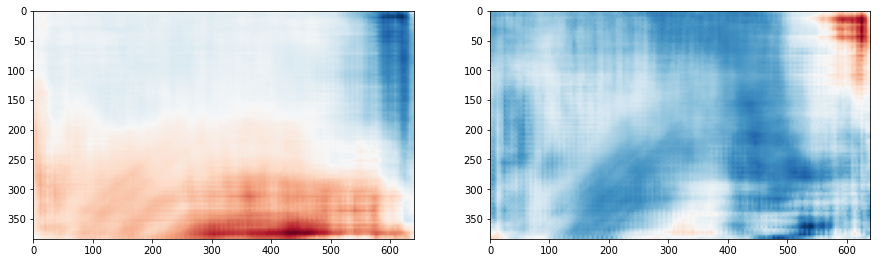

In [32]:
index = 0
visualize_depth(load(builder.dataframe.path_to_depth[index]))
visualize_optical_flow(load(builder.dataframe.path_to_optical_flow[index]))